# **Predictive Modeling for Loan Recovery Optimization in Financial Institutions**

## **Abstract**

Loan default remains a critical challenge for financial institutions, leading to high non-performing loans (NPLs) and financial instability. Traditional recovery strategies often rely on reactive approaches, resulting in inefficiencies and resource wastage. This research proposes a predictive analytics model to optimize loan recovery by identifying high-risk borrowers and enabling targeted collection efforts. By leveraging machine learning techniques, the study aims to enhance recovery rates while minimizing operational costs. The model’s effectiveness will be assessed using AUC-ROC as the primary metric, complemented by Precision at K, Recovery Rate, and Operational Cost Reduction.

## **Introduction**

Loan delinquency significantly affects the financial health of lending institutions, leading to liquidity constraints and revenue losses. Conventional recovery strategies often follow generalized approaches that do not account for borrower-specific risk levels. Predictive analytics offers a data-driven solution by enabling institutions to assess risk early and optimize collection efforts. This study explores the application of machine learning techniques to develop a loan recovery model that enhances financial sustainability.

## **Problem Statement**

Loan defaults contribute to financial losses and increased recovery costs for lenders. Current collection strategies are largely manual and inefficient, leading to suboptimal results. The lack of predictive capabilities limits institutions from prioritizing high-risk borrowers for targeted recovery efforts. This study aims to develop a machine learning model that classifies borrowers based on their likelihood of repaying overdue loans, improving the efficiency and effectiveness of recovery strategies.

## **Objectives**

The key objectives of this study are:

1. To analyze historical loan repayment data and identify key risk factors influencing default.

2. To develop a predictive model for classifying borrowers based on their likelihood of repayment.

3. To evaluate model performance using relevant success metrics, ensuring both technical accuracy and business applicability.

4. To assess the impact of the model on loan recovery rates and operational efficiency.

5. To propose a data-driven strategy for optimizing loan collection efforts.

## **Dataset**

This dataset contains information about borrowers, loans, and their repayment status.

1. **Borrower Information**

These columns describe the borrower’s profile:

- Borrower_ID – A unique identifier for each borrower (Not useful for analysis).

- Age – The borrower's age. Helps determine if younger or older individuals default more.

- Gender – Male or Female. May indicate trends in repayment behavior.

- Employment_Type – Categorizes borrowers as Salaried or Self-Employed.

- Monthly_Income – How much a borrower earns per month. Critical for assessing their ability to repay.

- Num_Dependents – Number of people financially dependent on the borrower.

2. **Loan Details**

These columns describe the loan given to the borrower:

- Loan_ID – A unique identifier for each loan (Not useful for analysis).

- Loan_Amount – The total amount borrowed.

- Loan_Tenure – Loan duration in months (e.g., 12 months, 24 months, etc.).

- Interest_Rate – The rate charged on the loan (% per year).

- Loan_Type – Could be Personal Loan, Mortgage, Auto Loan, Education Loan, etc.

- Collateral_Value – If the loan is secured, this is the value of the asset used as collateral.

- Outstanding_Loan_Amount – The amount still unpaid by the borrower.

- Monthly_EMI – The fixed Equated Monthly Installment (EMI) the borrower must pay.

3. **Repayment & Loan Recovery Information**

These columns track how well borrowers are repaying their loans:

- Payment_History – Shows past repayment behavior:

"On-Time" → Paid without delays.

"Delayed" → Paid late but eventually cleared.

"Defaulted" → Failed to pay.

- Num_Missed_Payments – Number of times the borrower skipped payments.

- Days_Past_Due – The total days a borrower is overdue.


- Recovery_Status – The final status of the loan:

"Fully Recovered" → Loan paid in full.

"Partially Recovered" → Some payments made but not fully repaid.

"Not Recovered" → Borrower defaulted completely.

- Collection_Attempts – How many times the lender tried to recover money.

- Collection_Method – The strategy used to recover the loan, such as:

"Calls" → Contacting the borrower.

"Debt Collectors" → Hiring an agency.

"Legal Notice" → Sending a legal warning.

"Settlement Offer" → Offering a discount for early payment.

- Legal_Action_Taken – Indicates whether the borrower was sued for non-payment.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
data= pd.read_csv("data/loan-recovery.csv")
data.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [10]:
data.columns

Index(['Borrower_ID', 'Age', 'Gender', 'Employment_Type', 'Monthly_Income',
       'Num_Dependents', 'Loan_ID', 'Loan_Amount', 'Loan_Tenure',
       'Interest_Rate', 'Loan_Type', 'Collateral_Value',
       'Outstanding_Loan_Amount', 'Monthly_EMI', 'Payment_History',
       'Num_Missed_Payments', 'Days_Past_Due', 'Recovery_Status',
       'Collection_Attempts', 'Collection_Method', 'Legal_Action_Taken'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

In [12]:
data.drop(columns=['Borrower_ID', 'Loan_ID'], inplace=True)


In [13]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values


Number of duplicate rows: 0

Missing values per column:
Series([], dtype: int64)


In [14]:
data.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


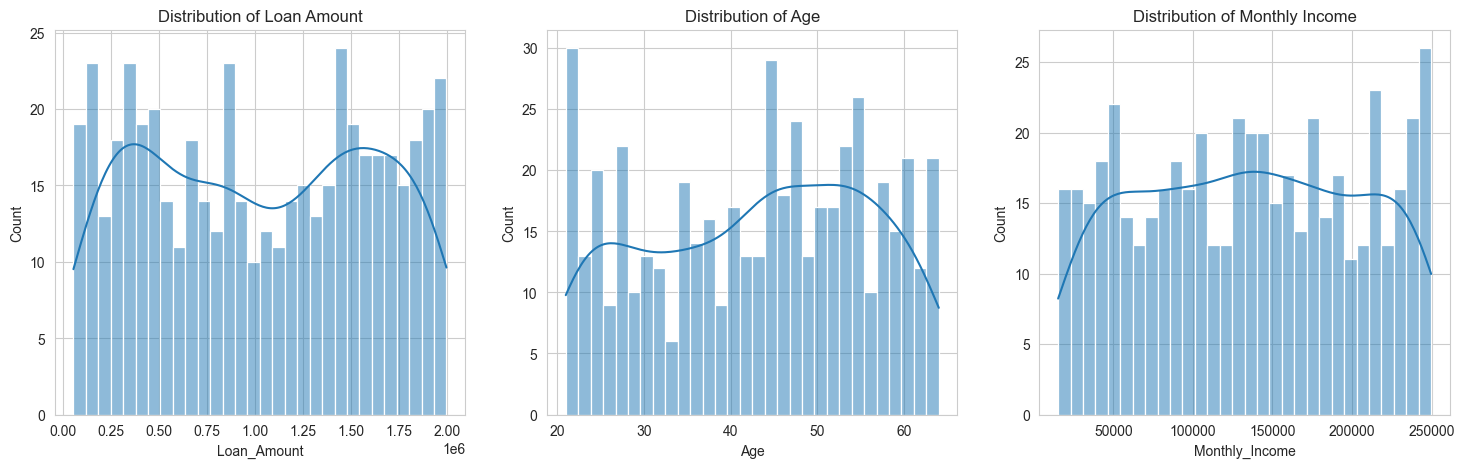

In [15]:
# Set style
sns.set_style("whitegrid")

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data['Loan_Amount'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Loan Amount')

sns.histplot(data['Age'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Age')

sns.histplot(data['Monthly_Income'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Monthly Income')

plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2956\3399532064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', ax=axes[0], palette='pastel')
C:\Users\Hp\AppData\Local\Temp\ipykernel_2956\3399532064.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Employment_Type', ax=axes[1], palette='muted')
C:\Users\Hp\AppData\Local\Temp\ipykernel_2956\3399532064.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Recovery_Status', ax=axes[2], palette='Set2')


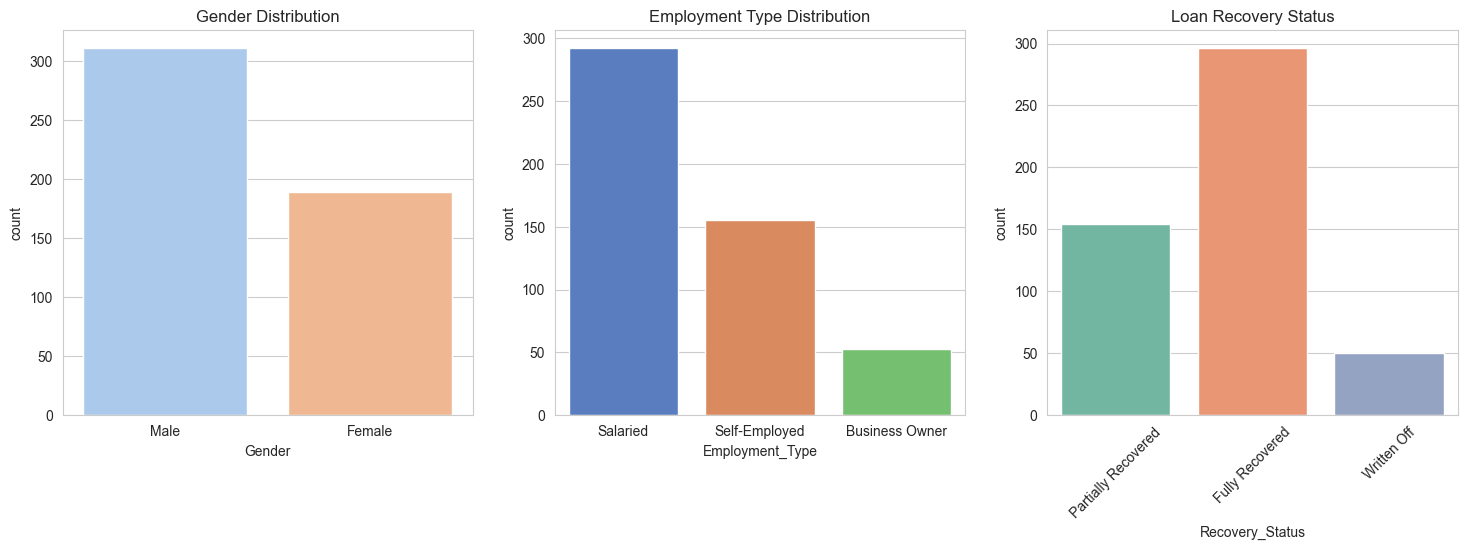

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=data, x='Gender', ax=axes[0], palette='pastel')
axes[0].set_title('Gender Distribution')

sns.countplot(data=data, x='Employment_Type', ax=axes[1], palette='muted')
axes[1].set_title('Employment Type Distribution')

sns.countplot(data=data, x='Recovery_Status', ax=axes[2], palette='Set2')
axes[2].set_title('Loan Recovery Status')

plt.xticks(rotation=45)
plt.show()
